#### Wesleyan University ASTR 221

## Tutorial 3: Linear Interpolation

In previous tutorials, we have discussed moving from a continuous function to a discrete representation of that function.  This week we'll be discussing the reverse problem: given a set of discrete points $(x_i, y_i)$, how do we estimate the function at values in between (i.e., *interpolate* those values)?

In addition to the usual numpy and matplotlib, I also import ```interp1d``` from the scipy package:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120  
from math import pi
from scipy.interpolate import interp1d

Let's start by considering a sine wave.  We'll sample it every $\pi/3$ radians from 0 to $2\pi$,

In [2]:
# Construct array of equally-spaced grid points
xmin = 0.
xmax = 2*pi
dx = pi/3.
ncells = int((xmax - xmin)/dx)
dx = (xmax - xmin)/ncells   # For consistency, just in case it didn't go in evenly

x = np.linspace(xmin, xmax, ncells+1)
y = np.sin(x)

And plot our x and y points plus the underlying function:

Text(0, 0.5, 'y')

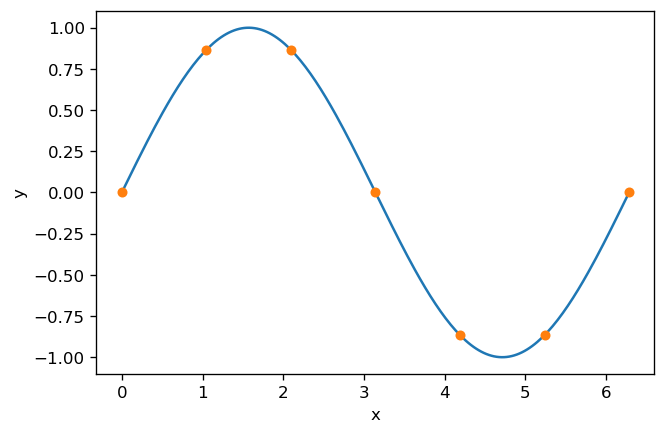

In [3]:
# Make a very high-resolution x-grid to show the underlying sine curve
x_hr = np.linspace(xmin, xmax, 200)
y_hr = np.sin(x_hr)

fig, ax = plt.subplots()
plt.plot(x_hr,y_hr, '-')
plt.plot(x, y, 'o', ms=5)
ax.set_xlabel('x')
ax.set_ylabel('y')

Recall that previously, we made the simplest possible assumption: that the value of the function at intermediate points is the same value as whichever point it is nearest to.  Below I'll use scipy's ```interp1d``` to show what that looks like.

```interp1d``` takes as its first two arguments a set of x and y points.  You can also specify what kind of interpolation you would like it to do.  In this case, I will choose "nearest".  The output of ```interp1d``` is itself a function, which you can then feed a set of x-values and it will interpolate the corresponding y-values for you using the method you specified.

Text(0, 0.5, 'y')

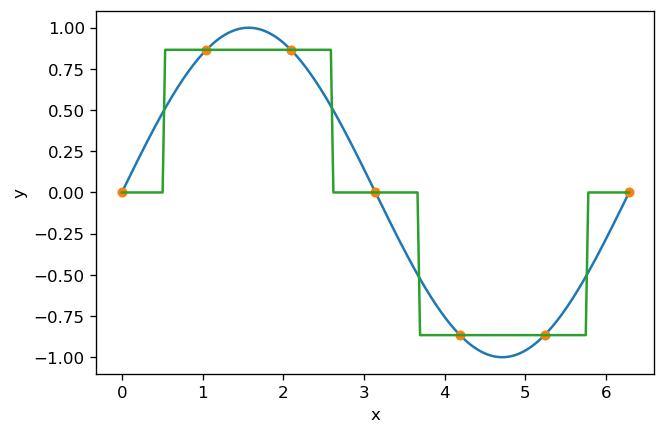

In [4]:
# Create nearest-point interpolation function from our (x,y) points
f_nearest = interp1d(x,y, kind='nearest')

# Use the function to interpolate y-values from our high-resolution array of x-values
y_nearest = f_nearest(x_hr)

fig, ax = plt.subplots()
plt.plot(x_hr,y_hr, '-')
plt.plot(x, y, 'o', ms=5)
plt.plot(x_hr, y_nearest, '-')
ax.set_xlabel('x')
ax.set_ylabel('y')

Let's see if we can improve upon this by interpolating linearly, that is, by drawing a straight line between each point.  (This is what matplotlib does when drawing lines given a set of points, by the way.)  From class, we know that our estimate of the function will then be
$$y_{\rm est} = y_i + \frac{y_{i+1} - y_i}{\Delta x}(x-x_i)$$
for $x$ between $x_i$ and $x_{i+1}$.

We'll start with just the first two points, $x = 0, \pi/3$, and draw the line between them.

Text(0, 0.5, 'y')

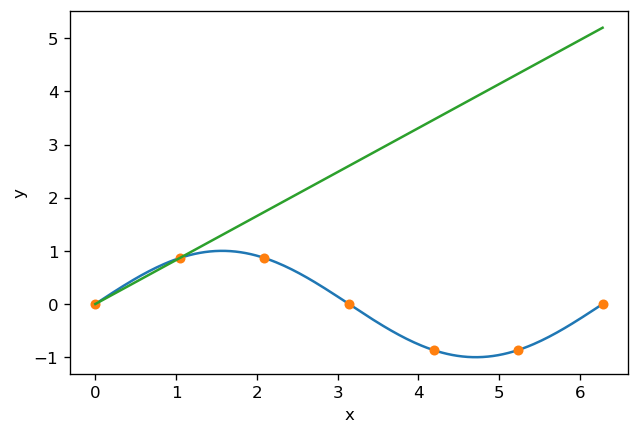

In [5]:
# Find the y-values on the straight line drawn between the first two points
y_linear = y[0] + (y[1]-y[0])/(x[1]-x[0])*(x_hr - x[0])

fig, ax = plt.subplots()
plt.plot(x_hr,y_hr, '-')
plt.plot(x, y, 'o', ms=5)
plt.plot(x_hr, y_linear, '-')
ax.set_xlabel('x')
ax.set_ylabel('y')

This worked perfectly - for the first two points!  Now we can extend this to the rest of the points.  Let's loop over each of the points up to the second to last, define the line to the next point, and calculate the y-values for x-values that lie between the points.

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 6.28318531]
None


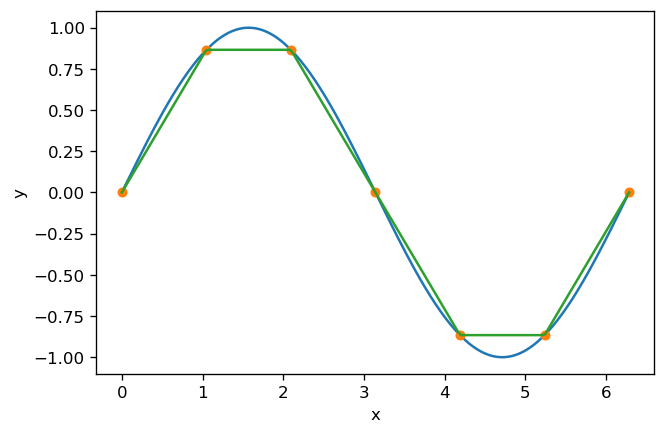

In [14]:
# Set up our y_linear array to be all zeros initially, we'll fill it in later
y_linear = x_hr*0

# Loop over points
for i in range(len(x)-1):
    # Define the endpoints
    x0 = x[i]
    x1 = x[i+1]
    y0 = y[i]
    y1 = y[i+1]

    # Find where the x-values in the high-res array fall between x0 and x1
    # the below command creates an array of booleans of length x_hr that satisfiies the following two conditions 
    # we then use this array in line 18 to index the x_hr array to only perform calcs on the x_hr's that satisfy these conditions 
    inrange = (x_hr >= x0) & (x_hr < x1)
    
    # Set points in that range to fall on the line between (x0, y0) and (x1, y1)
    y_linear[inrange] = y0 + (y1-y0)/(x1-x0)*(x_hr[inrange] - x0)
    # we index arrays using BOOLEAN values --- SO COOL 

fig, ax = plt.subplots()
plt.plot(x_hr,y_hr, '-')
plt.plot(x, y, 'o', ms=5)
plt.plot(x_hr, y_linear, '-')
ax.set_xlabel('x')
ax.set_ylabel('y')
print(print(x))

Ta da!  Let's check by comparing against the results of ```interp1d``` with the linear interpolation mode:

Text(0, 0.5, 'y')

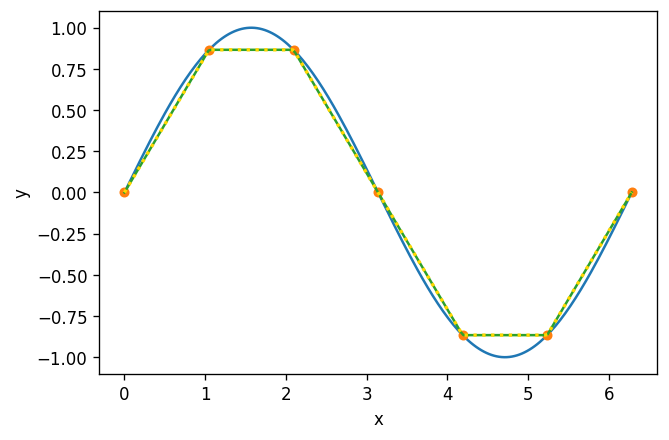

In [9]:
# Create nearest-point interpolation function from our (x,y) points
f_linear = interp1d(x,y, kind='linear')

# Use the function to interpolate y-values from our high-resolution array of x-values
y_flin = f_linear(x_hr)

fig, ax = plt.subplots()
plt.plot(x_hr,y_hr, '-')
plt.plot(x, y, 'o', ms=5)
plt.plot(x_hr, y_linear, '-')
plt.plot(x_hr, y_flin, ':', color='gold', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('y')

Excellent!  Now you can see that when you call a function that performs a linear interpolation, this is all it is doing underneath the hood.  Linear interpolation is the default for many functions, although there are many more sophisticated interpolation techniques as well - some of which we will discuss next time!